In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import _tree
import seaborn as sns
from decisiontree_table_converter.converter import tree_to_decision_table
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
df = pd.read_csv('winequality-red.csv')
#df.describe().T

In [7]:
X=df.iloc[:,:11]
y=df.iloc[:,11:12]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)



In [8]:
class_names = clf.classes_
feature_names = X.columns

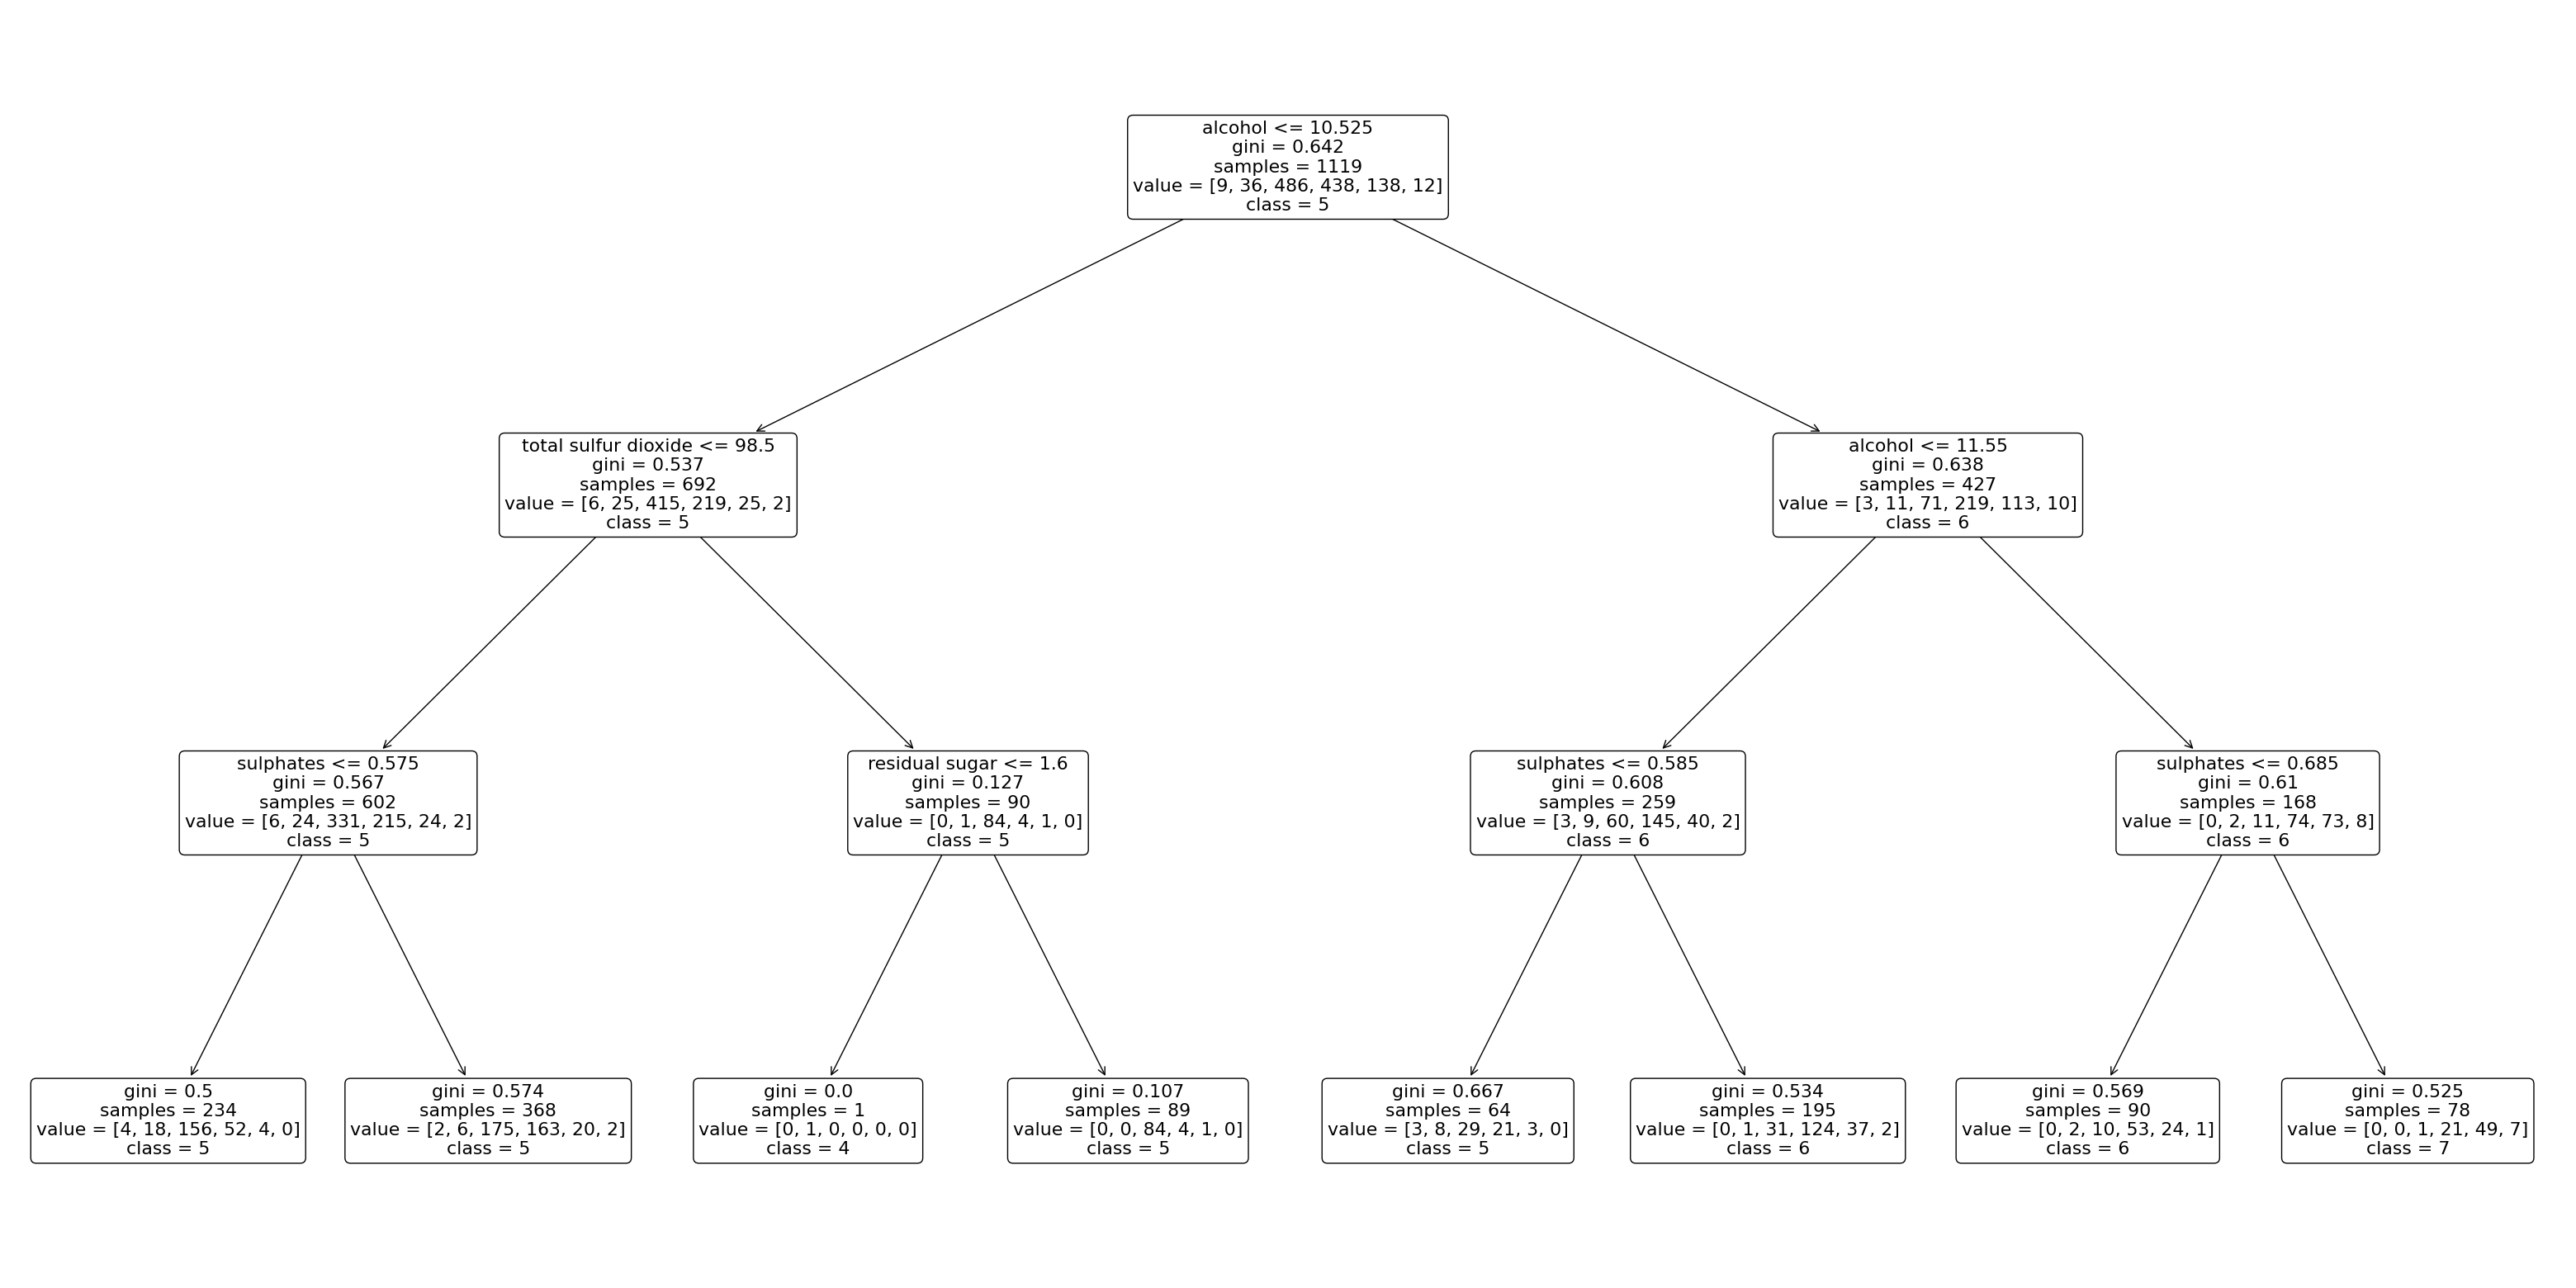

In [9]:
plt.figure(figsize=(40,20))
class_names = [str(name) for name in class_names]

plot_tree(clf, feature_names=X.columns,  class_names= class_names,  filled=False, rounded=True);
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

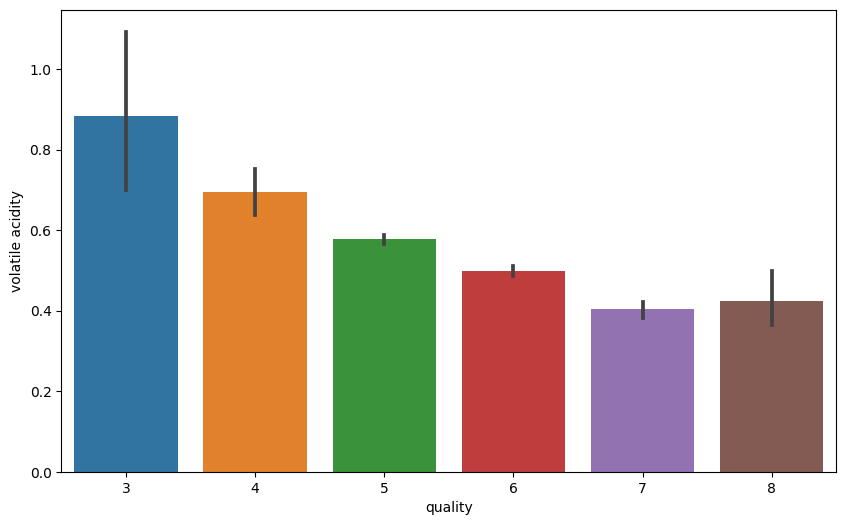

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

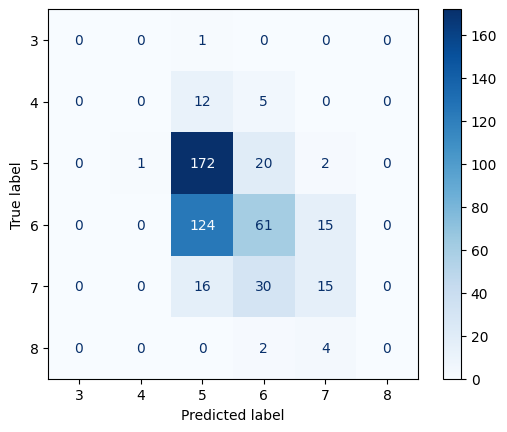

In [11]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [13]:
decision_table_df = tree_to_decision_table(clf, feature_names, class_names)
decision_table_df.to_csv('Drugs_DecisionTree.csv')